# 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



pd.set_option('display.max_columns', None)

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [2]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [3]:
test5 = pd.read_csv('data/test4.csv', index_col=False)

In [4]:
train7 = pd.read_csv('data/train6.csv', index_col=False)

In [5]:
test7 = pd.read_csv('data/test6.csv', index_col=False)

# 1. PCA

In [7]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
explained_variance = pca.explained_variance_ratio_

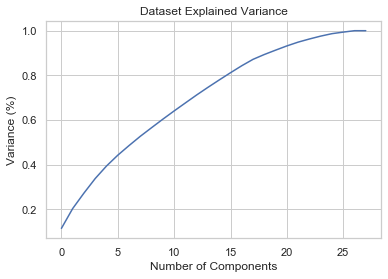

In [13]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [85]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
pca = PCA(n_components=20)

In [88]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# solver = 'lbfgs'

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = lr.predict(X_test)

In [92]:
lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')

In [93]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))
print('\n')
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores on CV===")
print(lr_cv_score)
print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== All f1 Scores on CV===")
print(lr_cv_score1)
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())

=== f1 score on test===
0.5189222862482479


=== Confusion Matrix on test===
[[299603    645]
 [  2444   1666]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    300248
           1       0.72      0.41      0.52      4110

    accuracy                           0.99    304358
   macro avg       0.86      0.70      0.76    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores on CV===
[0.96381158 0.963692   0.96614903 0.96228087 0.96959516 0.95841067
 0.96282906 0.96647063 0.96385464 0.96867568]


=== Mean AUC Score on CV===
Mean AUC Score:  0.9645769330814623


=== All f1 Scores on CV===
[0.52023576 0.52170512 0.51308485 0.50949367 0.51749902 0.50553797
 0.53643411 0.48977956 0.51934985 0.51837373]


=== Mean f1 Score on CV===
Mean f1 Score:  0.5151493637668889


# Catboosting

In [29]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)



In [42]:
from catboost import Pool, CatBoostClassifier
from sklearn.pipeline import Pipeline

In [31]:



pip_cat = Pipeline([('scaler', StandardScaler()),('cat',CatBoostRegressor())])

parameters = {'cat__max_depth': [5, 6, 7], 'cat__n_estimators': [70, 80 ,90], 'cat__learning_rate':[0.05, 0.08, 0.1], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.1,
 'cat__max_depth': 7,
 'cat__n_estimators': 90,
 'cat__random_state': 0,
 'cat__silent': True}

In [32]:

parameters = {'cat__max_depth': [7, 8, 9], 'cat__n_estimators': [90, 100, 110], 'cat__learning_rate':[0.1, 0.2, 0.3], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.3,
 'cat__max_depth': 9,
 'cat__n_estimators': 110,
 'cat__random_state': 0,
 'cat__silent': True}

In [34]:

parameters = {'cat__max_depth': [9,10,11], 'cat__n_estimators': [110,120,130], 'cat__learning_rate':[0.3,0.4,0.5], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.4,
 'cat__max_depth': 11,
 'cat__n_estimators': 130,
 'cat__random_state': 0,
 'cat__silent': True}

In [35]:

parameters = {'cat__max_depth': [11,12,13], 'cat__n_estimators': [130,150,170], 'cat__learning_rate':[0.4], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.4,
 'cat__max_depth': 12,
 'cat__n_estimators': 170,
 'cat__random_state': 0,
 'cat__silent': True}

In [36]:
parameters = {'cat__max_depth': [12], 'cat__n_estimators': [170,300, 500], 'cat__learning_rate':[0.4], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.4,
 'cat__max_depth': 12,
 'cat__n_estimators': 500,
 'cat__random_state': 0,
 'cat__silent': True}

In [37]:
parameters = {'cat__max_depth': [12], 'cat__n_estimators': [500,800,1000], 'cat__learning_rate':[0.4], 'cat__random_state':[0], 'cat__silent':[True]}
pip_cat_cv = GridSearchCV(pip_cat, param_grid=parameters, cv=5)
pip_cat_cv.fit(X_train, y_train)
pip_cat_cv.best_params_

{'cat__learning_rate': 0.4,
 'cat__max_depth': 12,
 'cat__n_estimators': 1000,
 'cat__random_state': 0,
 'cat__silent': True}

In [43]:
pip_cat_best_cv = Pipeline([('scaler', StandardScaler()),('cat',CatBoostClassifier(max_depth=12, n_estimators=1000, learning_rate=0.4, random_state=0, silent=True))])
pip_cat_best_cv.fit(X_train, y_train)
y_pip_cat_best_cv_pred = pip_cat_best_cv.predict(X_test)

In [52]:
test5 = pd.read_csv('data/test4.csv', index_col=False)

In [53]:
test_with_index = test5.drop(['time1'], axis=1)

In [54]:

y_pip_cat_best_cv_pred = pip_cat_best_cv.predict(test_with_index)

In [56]:
test_with_index['fraud_ind'] = y_pip_cat_best_cv_pred
test_with_index.fraud_ind.value_counts()
test_with_index['txkey']=test_with_index.transaction_no
cat_best = test_with_index[['txkey','fraud_ind']]

In [58]:
test_with_index.fraud_ind.value_counts()



0.0    418384
1.0      3281
Name: fraud_ind, dtype: int64

In [59]:
cat_best.to_csv('data/cat_best.csv', index=False)

In [60]:
cat_best

,txkey,fraud_ind
0,1748381,0.0
1,1820918,0.0
2,1535718,0.0
3,1397857,0.0
4,1256369,0.0
...,...,...
421660,245743,0.0
421661,639157,0.0
421662,188130,0.0
421663,418742,0.0


In [45]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pip_cat_best_cv_pred))

=== f1 score on test===
0.7791476815867059


# Gradientboositng

In [ ]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


pip_gbr = Pipeline([('scaler', StandardScaler()),('gbr',GradientBoostingRegressor())])

parameters = {'gbr__max_depth': [10 ,11, 12], 'gbr__n_estimators': [90, 100, 110], 'gbr__max_features':['auto'], 'gbr__learning_rate':[0.1, 0.2, 0.3]}
pip_gbr_cv = GridSearchCV(pip_gbr, param_grid=parameters, cv=5)
pip_gbr_cv.fit(X_train, y_train)

In [63]:
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve


In [64]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.964018	valid_0's binary_logloss: 0.0396135	valid_0's l1: 0.0217886
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.974979	valid_0's binary_logloss: 0.0374923	valid_0's l1: 0.0209771
[3]	valid_0's auc: 0.984688	valid_0's binary_logloss: 0.0355084	valid_0's l1: 0.0202155
[4]	valid_0's auc: 0.985774	valid_0's binary_logloss: 0.0341383	valid_0's l1: 0.0195198
[5]	valid_0's auc: 0.986047	valid_0's binary_logloss: 0.0330023	valid_0's l1: 0.0188846
[6]	valid_0's auc: 0.986254	valid_0's binary_logloss: 0.0319543	valid_0's l1: 0.0182928
[7]	valid_0's auc: 0.986649	valid_0's binary_logloss: 0.031035	valid_0's l1: 0.0177678
[8]	valid_0's auc: 0.986943	valid_0's binary_logloss: 0.0302766	valid_0's l1: 0.0172823
[9]	valid_0's auc: 0.98722	valid_0's binary_logloss: 0.0295895	valid_0's l1: 0.0168441
[10]	valid_0's auc: 0.987315	valid_0's binary_logloss: 0.0289579	valid_0's l1: 0.0164349
[11]	valid_0's auc: 0.987398	valid_0's binary_logloss: 0.0284

[23]	valid_0's auc: 0.98804	valid_0's binary_logloss: 0.0249452	valid_0's l1: 0.0136001
[24]	valid_0's auc: 0.988061	valid_0's binary_logloss: 0.02481	valid_0's l1: 0.0135092
[25]	valid_0's auc: 0.988098	valid_0's binary_logloss: 0.0246637	valid_0's l1: 0.0134082
[26]	valid_0's auc: 0.988136	valid_0's binary_logloss: 0.0245304	valid_0's l1: 0.0133117
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.988136	valid_0's binary_logloss: 0.0245304	valid_0's l1: 0.0133117
[1]	valid_0's auc: 0.964351	valid_0's binary_logloss: 0.039409	valid_0's l1: 0.0218422
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.974826	valid_0's binary_logloss: 0.0372457	valid_0's l1: 0.0210447
[3]	valid_0's auc: 0.975703	valid_0's binary_logloss: 0.035596	valid_0's l1: 0.0202957
[4]	valid_0's auc: 0.985209	valid_0's binary_logloss: 0.0342179	valid_0's l1: 0.0195982
[5]	valid_0's auc: 0.986232	valid_0's binary_logloss: 0.0330448	valid_0's l1: 0.018941
[6]	valid_0's

KeyboardInterrupt: 

In [10]:
print('Best parameters found by grid search are:', gridsearch.best_params_)


Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 32}


In [67]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 32)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.963427	valid_0's binary_logloss: 0.039748	valid_0's l1: 0.0218657
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.974527	valid_0's binary_logloss: 0.0374516	valid_0's l1: 0.021069
[3]	valid_0's auc: 0.984779	valid_0's binary_logloss: 0.0357835	valid_0's l1: 0.0203151
[4]	valid_0's auc: 0.985073	valid_0's binary_logloss: 0.0344474	valid_0's l1: 0.0196345
[5]	valid_0's auc: 0.986036	valid_0's binary_logloss: 0.0332144	valid_0's l1: 0.0190148
[6]	valid_0's auc: 0.986224	valid_0's binary_logloss: 0.0322011	valid_0's l1: 0.0184445
[7]	valid_0's auc: 0.986268	valid_0's binary_logloss: 0.031376	valid_0's l1: 0.0179307
[8]	valid_0's auc: 0.986396	valid_0's binary_logloss: 0.0306413	valid_0's l1: 0.0174738
[9]	valid_0's auc: 0.986655	valid_0's binary_logloss: 0.0299494	valid_0's l1: 0.0170496
[10]	valid_0's auc: 0.987097	valid_0's binary_logloss: 0.0293246	valid_0's l1: 0.0166539
[11]	valid_0's auc: 0.98713	valid_0's binary_logloss: 0.028814

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=32, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

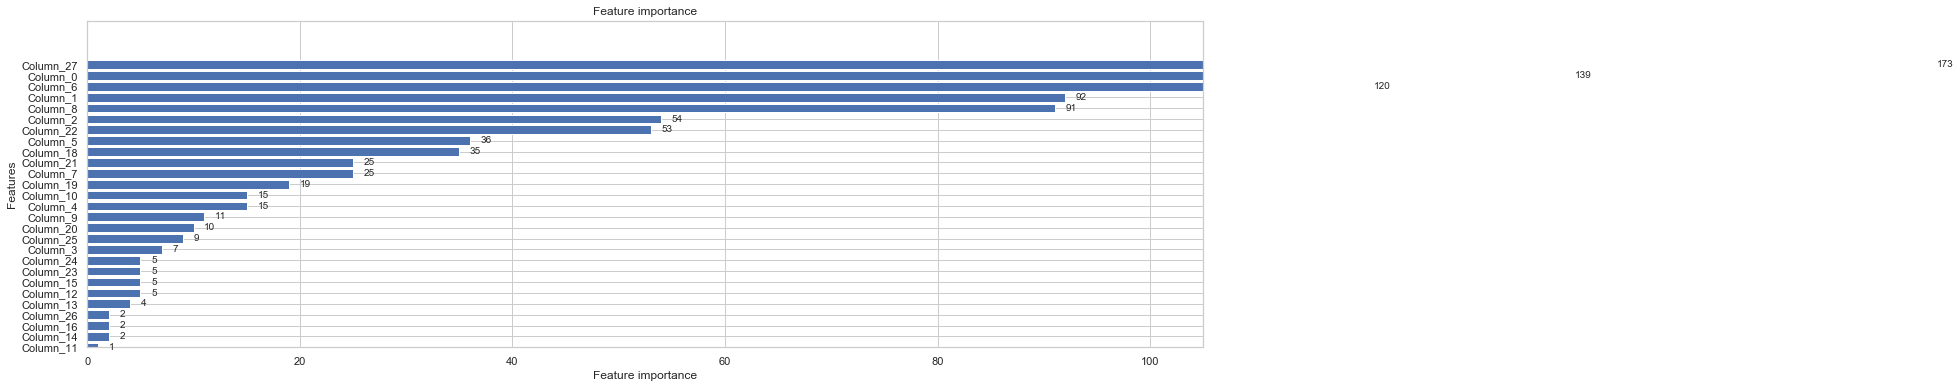

In [12]:

ax = lgb.plot_importance(gbm, height = 0.8, 
                         max_num_features = 30, 
                         xlim = (0,105), ylim = (0,30), 
                         figsize = (20,6))
plt.show()

In [13]:
train_with_index.head()

,card_no,date,time,hr,country,city,money_spent,receiver_code,bank_no,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,payment_type,term_mark,terms,mcc,merchandise_code,over_limit,situation_code,transaction_no,num_index,in_five_mins,diff_country_cont2,five_mins_diff_country_cont2,rate_of_fraud_for_each_mchno
0,0,1.0,151948,15,102,5817,236.43,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,274548,284164,0.0,0.0,0.0,0.000526
1,0,4.0,154407,15,102,5817,319.72,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,391141,1185304,0.0,0.0,0.0,0.000526
2,0,29.0,152243,15,102,5817,272.12,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,426341,155960,0.0,0.0,0.0,0.000526
3,0,37.0,143710,14,102,5817,283.91,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,399230,418445,0.0,0.0,0.0,0.000526
4,0,43.0,140023,14,102,5817,250.19,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,112708,1223772,0.0,0.0,0.0,0.000526


In [14]:
# 'hr', 'country','transaction_category','online_transaction', 'transaction_type', 'fallback_mark', '3ds_mark',\
# 'payment_type', 'term_mark', 'terms','merchandise_code','over_limit','num_index','in_five_mins', \
# 'diff_country_cont2', 'five_mins_diff_country_cont2'

In [15]:
importances = sorted(gbm.feature_importances_,reverse=True)


In [16]:

# The code below aims to drop  to keep the features that are included in the most important features. 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

173
139
120
92
91
54
53
36
35
25
25 0.8520833333333333


In [17]:
#The above means let go of all variables after PAY_AMT_5
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0 = str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.9894060257308136


In [19]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [68]:
y_pred = gbm.predict(X_test)

In [69]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))

=== f1 score on test===
0.6312077578607113


In [20]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))

=== f1 score on test===
0.6312077578607113


In [17]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [18]:
train_with_index1 = train_with_index.drop(['hr', 'country','transaction_category','online_transaction', 'transaction_type', 'fallback_mark', '3ds_mark',\
'payment_type', 'term_mark', 'terms','merchandise_code','over_limit','num_index','in_five_mins', \
'diff_country_cont2', 'five_mins_diff_country_cont2'], axis=1)

In [21]:

# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(train_with_index1, train_fraud_with_index, test_size=0.1, random_state=21)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0391523	valid_0's l1: 0.0218212
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.979339	valid_0's binary_logloss: 0.0372291	valid_0's l1: 0.0210388
[3]	valid_0's auc: 0.980126	valid_0's binary_logloss: 0.0355616	valid_0's l1: 0.0202799
[4]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.034181	valid_0's l1: 0.0195958
[5]	valid_0's auc: 0.984554	valid_0's binary_logloss: 0.0330449	valid_0's l1: 0.0189859
[6]	valid_0's auc: 0.984683	valid_0's binary_logloss: 0.0320856	valid_0's l1: 0.0184317
[7]	valid_0's auc: 0.985263	valid_0's binary_logloss: 0.0311908	valid_0's l1: 0.0179325
[8]	valid_0's auc: 0.985357	valid_0's binary_logloss: 0.0304341	valid_0's l1: 0.017464
[9]	valid_0's auc: 0.985465	valid_0's binary_logloss: 0.0297371	valid_0's l1: 0.0170327
[10]	valid_0's auc: 0.985663	valid_0's binary_logloss: 0.029106	valid_0's l1: 0.0166524
[11]	valid_0's auc: 0.98572	valid_0's binary_logloss: 0.028589

[9]	valid_0's auc: 0.985651	valid_0's binary_logloss: 0.0297489	valid_0's l1: 0.016986
[10]	valid_0's auc: 0.98586	valid_0's binary_logloss: 0.0291536	valid_0's l1: 0.0166096
[11]	valid_0's auc: 0.985965	valid_0's binary_logloss: 0.0286135	valid_0's l1: 0.0162517
[12]	valid_0's auc: 0.986044	valid_0's binary_logloss: 0.0281373	valid_0's l1: 0.0159209
[13]	valid_0's auc: 0.98607	valid_0's binary_logloss: 0.027721	valid_0's l1: 0.015619
[14]	valid_0's auc: 0.986146	valid_0's binary_logloss: 0.0273457	valid_0's l1: 0.015362
[15]	valid_0's auc: 0.986174	valid_0's binary_logloss: 0.0270094	valid_0's l1: 0.01511
[16]	valid_0's auc: 0.987005	valid_0's binary_logloss: 0.0267209	valid_0's l1: 0.0148891
[17]	valid_0's auc: 0.987084	valid_0's binary_logloss: 0.0264077	valid_0's l1: 0.0146748
[18]	valid_0's auc: 0.987134	valid_0's binary_logloss: 0.0261128	valid_0's l1: 0.0144775
[19]	valid_0's auc: 0.987174	valid_0's binary_logloss: 0.0258665	valid_0's l1: 0.0142965
[20]	valid_0's auc: 0.987197	v

[8]	valid_0's auc: 0.985193	valid_0's binary_logloss: 0.0304203	valid_0's l1: 0.017288
[9]	valid_0's auc: 0.985303	valid_0's binary_logloss: 0.0297611	valid_0's l1: 0.0168564
[10]	valid_0's auc: 0.985373	valid_0's binary_logloss: 0.0291549	valid_0's l1: 0.0164638
[11]	valid_0's auc: 0.985479	valid_0's binary_logloss: 0.0285723	valid_0's l1: 0.0160901
[12]	valid_0's auc: 0.985667	valid_0's binary_logloss: 0.0280379	valid_0's l1: 0.0157626
[13]	valid_0's auc: 0.986376	valid_0's binary_logloss: 0.0275914	valid_0's l1: 0.0154632
[14]	valid_0's auc: 0.986495	valid_0's binary_logloss: 0.0271819	valid_0's l1: 0.0151742
[15]	valid_0's auc: 0.986701	valid_0's binary_logloss: 0.0267841	valid_0's l1: 0.0149185
[16]	valid_0's auc: 0.986767	valid_0's binary_logloss: 0.0264421	valid_0's l1: 0.0146969
[17]	valid_0's auc: 0.987022	valid_0's binary_logloss: 0.0261576	valid_0's l1: 0.0145025
[18]	valid_0's auc: 0.987076	valid_0's binary_logloss: 0.0259723	valid_0's l1: 0.0143327
[19]	valid_0's auc: 0.98

[21]	valid_0's auc: 0.988442	valid_0's binary_logloss: 0.0253183	valid_0's l1: 0.0138653
[22]	valid_0's auc: 0.988496	valid_0's binary_logloss: 0.0251084	valid_0's l1: 0.0137276
[23]	valid_0's auc: 0.988531	valid_0's binary_logloss: 0.024934	valid_0's l1: 0.0136084
[24]	valid_0's auc: 0.988576	valid_0's binary_logloss: 0.024797	valid_0's l1: 0.0135069
[25]	valid_0's auc: 0.988617	valid_0's binary_logloss: 0.0247681	valid_0's l1: 0.0134272
[26]	valid_0's auc: 0.988699	valid_0's binary_logloss: 0.024617	valid_0's l1: 0.0133191
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.988699	valid_0's binary_logloss: 0.024617	valid_0's l1: 0.0133191
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0391523	valid_0's l1: 0.0218212
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.979339	valid_0's binary_logloss: 0.0372291	valid_0's l1: 0.0210388
[3]	valid_0's auc: 0.980126	valid_0's binary_logloss: 0.0355616	valid_0's l1: 0.0202799
[4]	valid

[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0391523	valid_0's l1: 0.0218212
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.979339	valid_0's binary_logloss: 0.0372291	valid_0's l1: 0.0210388
[3]	valid_0's auc: 0.980126	valid_0's binary_logloss: 0.0355616	valid_0's l1: 0.0202799
[4]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.034181	valid_0's l1: 0.0195958
[5]	valid_0's auc: 0.984554	valid_0's binary_logloss: 0.0330449	valid_0's l1: 0.0189859
[6]	valid_0's auc: 0.984683	valid_0's binary_logloss: 0.0320856	valid_0's l1: 0.0184317
[7]	valid_0's auc: 0.985263	valid_0's binary_logloss: 0.0311908	valid_0's l1: 0.0179325
[8]	valid_0's auc: 0.985357	valid_0's binary_logloss: 0.0304341	valid_0's l1: 0.017464
[9]	valid_0's auc: 0.985465	valid_0's binary_logloss: 0.0297371	valid_0's l1: 0.0170327
[10]	valid_0's auc: 0.985663	valid_0's binary_logloss: 0.029106	valid_0's l1: 0.0166524
[11]	valid_0's auc: 0.98572	valid_0's binary_logloss: 0.028589

[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0391523	valid_0's l1: 0.0218212
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.979339	valid_0's binary_logloss: 0.0372291	valid_0's l1: 0.0210388
[3]	valid_0's auc: 0.980126	valid_0's binary_logloss: 0.0355616	valid_0's l1: 0.0202799
[4]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.034181	valid_0's l1: 0.0195958
[5]	valid_0's auc: 0.984554	valid_0's binary_logloss: 0.0330449	valid_0's l1: 0.0189859
[6]	valid_0's auc: 0.984683	valid_0's binary_logloss: 0.0320856	valid_0's l1: 0.0184317
[7]	valid_0's auc: 0.985263	valid_0's binary_logloss: 0.0311908	valid_0's l1: 0.0179325
[8]	valid_0's auc: 0.985357	valid_0's binary_logloss: 0.0304341	valid_0's l1: 0.017464
[9]	valid_0's auc: 0.985465	valid_0's binary_logloss: 0.0297371	valid_0's l1: 0.0170327
[10]	valid_0's auc: 0.985663	valid_0's binary_logloss: 0.029106	valid_0's l1: 0.0166524
[11]	valid_0's auc: 0.98572	valid_0's binary_logloss: 0.028589

[28]	valid_0's auc: 0.988789	valid_0's binary_logloss: 0.0243861	valid_0's l1: 0.013152
[29]	valid_0's auc: 0.988944	valid_0's binary_logloss: 0.0242495	valid_0's l1: 0.0130985
[30]	valid_0's auc: 0.988995	valid_0's binary_logloss: 0.0241289	valid_0's l1: 0.0130151
[31]	valid_0's auc: 0.989051	valid_0's binary_logloss: 0.0240231	valid_0's l1: 0.0129435
[32]	valid_0's auc: 0.989153	valid_0's binary_logloss: 0.0239094	valid_0's l1: 0.0128754
Did not meet early stopping. Best iteration is:
[32]	valid_0's auc: 0.989153	valid_0's binary_logloss: 0.0239094	valid_0's l1: 0.0128754
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0391523	valid_0's l1: 0.0218212
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.979339	valid_0's binary_logloss: 0.0372291	valid_0's l1: 0.0210388
[3]	valid_0's auc: 0.980126	valid_0's binary_logloss: 0.0355616	valid_0's l1: 0.0202799
[4]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.034181	valid_0's l1: 0.0195958
[5]	vali

[17]	valid_0's auc: 0.987022	valid_0's binary_logloss: 0.0261576	valid_0's l1: 0.0145025
[18]	valid_0's auc: 0.987076	valid_0's binary_logloss: 0.0259723	valid_0's l1: 0.0143327
[19]	valid_0's auc: 0.987929	valid_0's binary_logloss: 0.0257273	valid_0's l1: 0.0141543
[20]	valid_0's auc: 0.988003	valid_0's binary_logloss: 0.0255061	valid_0's l1: 0.0140036
[21]	valid_0's auc: 0.988442	valid_0's binary_logloss: 0.0253183	valid_0's l1: 0.0138653
[22]	valid_0's auc: 0.988496	valid_0's binary_logloss: 0.0251084	valid_0's l1: 0.0137276
[23]	valid_0's auc: 0.988531	valid_0's binary_logloss: 0.024934	valid_0's l1: 0.0136084
[24]	valid_0's auc: 0.988576	valid_0's binary_logloss: 0.024797	valid_0's l1: 0.0135069
[25]	valid_0's auc: 0.988617	valid_0's binary_logloss: 0.0247681	valid_0's l1: 0.0134272
[26]	valid_0's auc: 0.988699	valid_0's binary_logloss: 0.024617	valid_0's l1: 0.0133191
[27]	valid_0's auc: 0.98876	valid_0's binary_logloss: 0.0244952	valid_0's l1: 0.0132331
[28]	valid_0's auc: 0.988

[9]	valid_0's auc: 0.985452	valid_0's binary_logloss: 0.0285861	valid_0's l1: 0.0161453
[10]	valid_0's auc: 0.985579	valid_0's binary_logloss: 0.0280168	valid_0's l1: 0.0157529
[11]	valid_0's auc: 0.986441	valid_0's binary_logloss: 0.0275232	valid_0's l1: 0.0154227
[12]	valid_0's auc: 0.986499	valid_0's binary_logloss: 0.027188	valid_0's l1: 0.0151372
[13]	valid_0's auc: 0.986559	valid_0's binary_logloss: 0.0268142	valid_0's l1: 0.0148482
[14]	valid_0's auc: 0.986615	valid_0's binary_logloss: 0.026489	valid_0's l1: 0.014595
[15]	valid_0's auc: 0.987029	valid_0's binary_logloss: 0.0261979	valid_0's l1: 0.0143733
[16]	valid_0's auc: 0.987111	valid_0's binary_logloss: 0.025956	valid_0's l1: 0.0141766
[17]	valid_0's auc: 0.987162	valid_0's binary_logloss: 0.0257242	valid_0's l1: 0.0140007
[18]	valid_0's auc: 0.987191	valid_0's binary_logloss: 0.0256263	valid_0's l1: 0.0139013
[19]	valid_0's auc: 0.987783	valid_0's binary_logloss: 0.0254375	valid_0's l1: 0.0137473
[20]	valid_0's auc: 0.9878

[8]	valid_0's auc: 0.985223	valid_0's binary_logloss: 0.0298436	valid_0's l1: 0.0165581
[9]	valid_0's auc: 0.985314	valid_0's binary_logloss: 0.0291932	valid_0's l1: 0.0161186
[10]	valid_0's auc: 0.985446	valid_0's binary_logloss: 0.0285927	valid_0's l1: 0.0157084
[11]	valid_0's auc: 0.985563	valid_0's binary_logloss: 0.028032	valid_0's l1: 0.0153595
[12]	valid_0's auc: 0.986466	valid_0's binary_logloss: 0.0275625	valid_0's l1: 0.0150591
[13]	valid_0's auc: 0.986506	valid_0's binary_logloss: 0.0271728	valid_0's l1: 0.0147808
[14]	valid_0's auc: 0.986561	valid_0's binary_logloss: 0.0268115	valid_0's l1: 0.0145398
[15]	valid_0's auc: 0.986596	valid_0's binary_logloss: 0.0265358	valid_0's l1: 0.0143212
[16]	valid_0's auc: 0.986613	valid_0's binary_logloss: 0.0262772	valid_0's l1: 0.0141203
[17]	valid_0's auc: 0.986623	valid_0's binary_logloss: 0.0260994	valid_0's l1: 0.013994
[18]	valid_0's auc: 0.987414	valid_0's binary_logloss: 0.0258769	valid_0's l1: 0.0138361
[19]	valid_0's auc: 0.987

[21]	valid_0's auc: 0.987612	valid_0's binary_logloss: 0.0253213	valid_0's l1: 0.0134322
[22]	valid_0's auc: 0.987876	valid_0's binary_logloss: 0.0250517	valid_0's l1: 0.0133086
[23]	valid_0's auc: 0.987979	valid_0's binary_logloss: 0.0248752	valid_0's l1: 0.0132136
[24]	valid_0's auc: 0.988085	valid_0's binary_logloss: 0.0247349	valid_0's l1: 0.0131248
[25]	valid_0's auc: 0.988138	valid_0's binary_logloss: 0.0246097	valid_0's l1: 0.0130386
[26]	valid_0's auc: 0.988114	valid_0's binary_logloss: 0.0248913	valid_0's l1: 0.0131075
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.988138	valid_0's binary_logloss: 0.0246097	valid_0's l1: 0.0130386
[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.0387269	valid_0's l1: 0.0213575
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.975102	valid_0's binary_logloss: 0.0366285	valid_0's l1: 0.0204678
[3]	valid_0's auc: 0.977614	valid_0's binary_logloss: 0.0347896	valid_0's l1: 0.0196103
[4]	v

[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.0387269	valid_0's l1: 0.0213575
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.975102	valid_0's binary_logloss: 0.0366285	valid_0's l1: 0.0204678
[3]	valid_0's auc: 0.977614	valid_0's binary_logloss: 0.0347896	valid_0's l1: 0.0196103
[4]	valid_0's auc: 0.984449	valid_0's binary_logloss: 0.033505	valid_0's l1: 0.0188495
[5]	valid_0's auc: 0.984649	valid_0's binary_logloss: 0.0324013	valid_0's l1: 0.0181552
[6]	valid_0's auc: 0.984708	valid_0's binary_logloss: 0.0314118	valid_0's l1: 0.0175424
[7]	valid_0's auc: 0.984806	valid_0's binary_logloss: 0.0305995	valid_0's l1: 0.0169839
[8]	valid_0's auc: 0.984937	valid_0's binary_logloss: 0.0298505	valid_0's l1: 0.0164861
[9]	valid_0's auc: 0.985014	valid_0's binary_logloss: 0.0292202	valid_0's l1: 0.0160438
[10]	valid_0's auc: 0.985157	valid_0's binary_logloss: 0.0286542	valid_0's l1: 0.0156423
[11]	valid_0's auc: 0.98529	valid_0's binary_logloss: 0.0282

[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.0387269	valid_0's l1: 0.0213575
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.975102	valid_0's binary_logloss: 0.0366285	valid_0's l1: 0.0204678
[3]	valid_0's auc: 0.977614	valid_0's binary_logloss: 0.0347896	valid_0's l1: 0.0196103
[4]	valid_0's auc: 0.984449	valid_0's binary_logloss: 0.033505	valid_0's l1: 0.0188495
[5]	valid_0's auc: 0.984649	valid_0's binary_logloss: 0.0324013	valid_0's l1: 0.0181552
[6]	valid_0's auc: 0.984708	valid_0's binary_logloss: 0.0314118	valid_0's l1: 0.0175424
[7]	valid_0's auc: 0.984806	valid_0's binary_logloss: 0.0305995	valid_0's l1: 0.0169839
[8]	valid_0's auc: 0.984937	valid_0's binary_logloss: 0.0298505	valid_0's l1: 0.0164861
[9]	valid_0's auc: 0.985014	valid_0's binary_logloss: 0.0292202	valid_0's l1: 0.0160438
[10]	valid_0's auc: 0.985157	valid_0's binary_logloss: 0.0286542	valid_0's l1: 0.0156423
[11]	valid_0's auc: 0.98529	valid_0's binary_logloss: 0.0282

[31]	valid_0's auc: 0.987832	valid_0's binary_logloss: 0.0245955	valid_0's l1: 0.0128908
[32]	valid_0's auc: 0.98769	valid_0's binary_logloss: 0.0246662	valid_0's l1: 0.0128465
Did not meet early stopping. Best iteration is:
[29]	valid_0's auc: 0.988276	valid_0's binary_logloss: 0.0246052	valid_0's l1: 0.0129738
[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.0387269	valid_0's l1: 0.0213575
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.975102	valid_0's binary_logloss: 0.0366285	valid_0's l1: 0.0204678
[3]	valid_0's auc: 0.977614	valid_0's binary_logloss: 0.0347896	valid_0's l1: 0.0196103
[4]	valid_0's auc: 0.984449	valid_0's binary_logloss: 0.033505	valid_0's l1: 0.0188495
[5]	valid_0's auc: 0.984649	valid_0's binary_logloss: 0.0324013	valid_0's l1: 0.0181552
[6]	valid_0's auc: 0.984708	valid_0's binary_logloss: 0.0314118	valid_0's l1: 0.0175424
[7]	valid_0's auc: 0.984806	valid_0's binary_logloss: 0.0305995	valid_0's l1: 0.0169839
[8]	valid_0

[24]	valid_0's auc: 0.988085	valid_0's binary_logloss: 0.0247349	valid_0's l1: 0.0131248
[25]	valid_0's auc: 0.988138	valid_0's binary_logloss: 0.0246097	valid_0's l1: 0.0130386
[26]	valid_0's auc: 0.988114	valid_0's binary_logloss: 0.0248913	valid_0's l1: 0.0131075
[27]	valid_0's auc: 0.988149	valid_0's binary_logloss: 0.0247267	valid_0's l1: 0.0130328
[28]	valid_0's auc: 0.988228	valid_0's binary_logloss: 0.0246411	valid_0's l1: 0.0129875
[29]	valid_0's auc: 0.988276	valid_0's binary_logloss: 0.0246052	valid_0's l1: 0.0129738
[30]	valid_0's auc: 0.98786	valid_0's binary_logloss: 0.024662	valid_0's l1: 0.0129531
[31]	valid_0's auc: 0.987832	valid_0's binary_logloss: 0.0245955	valid_0's l1: 0.0128908
[32]	valid_0's auc: 0.98769	valid_0's binary_logloss: 0.0246662	valid_0's l1: 0.0128465
[33]	valid_0's auc: 0.987229	valid_0's binary_logloss: 0.0245318	valid_0's l1: 0.0128242
[34]	valid_0's auc: 0.987713	valid_0's binary_logloss: 0.0257941	valid_0's l1: 0.0128843
Early stopping, best ite

[9]	valid_0's auc: 0.973972	valid_0's binary_logloss: 0.0339382	valid_0's l1: 0.0157471
[10]	valid_0's auc: 0.979217	valid_0's binary_logloss: 0.0311638	valid_0's l1: 0.0152618
[11]	valid_0's auc: 0.977216	valid_0's binary_logloss: 0.0309042	valid_0's l1: 0.0149592
[12]	valid_0's auc: 0.977366	valid_0's binary_logloss: 0.0305692	valid_0's l1: 0.0146404
[13]	valid_0's auc: 0.975523	valid_0's binary_logloss: 0.0308013	valid_0's l1: 0.0143896
Early stopping, best iteration is:
[8]	valid_0's auc: 0.979397	valid_0's binary_logloss: 0.0325349	valid_0's l1: 0.0161441
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0394679	valid_0's l1: 0.0214633
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.963998	valid_0's binary_logloss: 0.0382445	valid_0's l1: 0.020578
[3]	valid_0's auc: 0.970605	valid_0's binary_logloss: 0.0357669	valid_0's l1: 0.0195732
[4]	valid_0's auc: 0.972747	valid_0's binary_logloss: 0.0342029	valid_0's l1: 0.018761
[5]	valid_0's auc: 0.97

[9]	valid_0's auc: 0.9809	valid_0's binary_logloss: 0.0304757	valid_0's l1: 0.0157068
[10]	valid_0's auc: 0.981848	valid_0's binary_logloss: 0.0299599	valid_0's l1: 0.0153107
[11]	valid_0's auc: 0.98285	valid_0's binary_logloss: 0.0294985	valid_0's l1: 0.0149551
[12]	valid_0's auc: 0.981948	valid_0's binary_logloss: 0.029838	valid_0's l1: 0.0146765
[13]	valid_0's auc: 0.983987	valid_0's binary_logloss: 0.0288388	valid_0's l1: 0.0144152
[14]	valid_0's auc: 0.984562	valid_0's binary_logloss: 0.0282579	valid_0's l1: 0.0141677
[15]	valid_0's auc: 0.98465	valid_0's binary_logloss: 0.0279459	valid_0's l1: 0.0139511
[16]	valid_0's auc: 0.984741	valid_0's binary_logloss: 0.0277402	valid_0's l1: 0.0137961
[17]	valid_0's auc: 0.984764	valid_0's binary_logloss: 0.0275294	valid_0's l1: 0.0136396
[18]	valid_0's auc: 0.982805	valid_0's binary_logloss: 0.0282457	valid_0's l1: 0.0135375
[19]	valid_0's auc: 0.983467	valid_0's binary_logloss: 0.0277127	valid_0's l1: 0.013405
[20]	valid_0's auc: 0.984061

[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0394679	valid_0's l1: 0.0214633
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.963998	valid_0's binary_logloss: 0.0382445	valid_0's l1: 0.020578
[3]	valid_0's auc: 0.970605	valid_0's binary_logloss: 0.0357669	valid_0's l1: 0.0195732
[4]	valid_0's auc: 0.972747	valid_0's binary_logloss: 0.0342029	valid_0's l1: 0.018761
[5]	valid_0's auc: 0.972993	valid_0's binary_logloss: 0.0328079	valid_0's l1: 0.0179864
[6]	valid_0's auc: 0.977817	valid_0's binary_logloss: 0.0318159	valid_0's l1: 0.017324
[7]	valid_0's auc: 0.979945	valid_0's binary_logloss: 0.0309422	valid_0's l1: 0.0167417
[8]	valid_0's auc: 0.979182	valid_0's binary_logloss: 0.0303369	valid_0's l1: 0.0162118
[9]	valid_0's auc: 0.980478	valid_0's binary_logloss: 0.0294135	valid_0's l1: 0.0157291
[10]	valid_0's auc: 0.981323	valid_0's binary_logloss: 0.028963	valid_0's l1: 0.0153372
[11]	valid_0's auc: 0.981528	valid_0's binary_logloss: 0.028517

[9]	valid_0's auc: 0.9809	valid_0's binary_logloss: 0.0304757	valid_0's l1: 0.0157068
[10]	valid_0's auc: 0.981848	valid_0's binary_logloss: 0.0299599	valid_0's l1: 0.0153107
[11]	valid_0's auc: 0.98285	valid_0's binary_logloss: 0.0294985	valid_0's l1: 0.0149551
[12]	valid_0's auc: 0.981948	valid_0's binary_logloss: 0.029838	valid_0's l1: 0.0146765
[13]	valid_0's auc: 0.983987	valid_0's binary_logloss: 0.0288388	valid_0's l1: 0.0144152
[14]	valid_0's auc: 0.984562	valid_0's binary_logloss: 0.0282579	valid_0's l1: 0.0141677
[15]	valid_0's auc: 0.98465	valid_0's binary_logloss: 0.0279459	valid_0's l1: 0.0139511
[16]	valid_0's auc: 0.984741	valid_0's binary_logloss: 0.0277402	valid_0's l1: 0.0137961
[17]	valid_0's auc: 0.984764	valid_0's binary_logloss: 0.0275294	valid_0's l1: 0.0136396
[18]	valid_0's auc: 0.982805	valid_0's binary_logloss: 0.0282457	valid_0's l1: 0.0135375
[19]	valid_0's auc: 0.983467	valid_0's binary_logloss: 0.0277127	valid_0's l1: 0.013405
[20]	valid_0's auc: 0.984061

[8]	valid_0's auc: 0.979397	valid_0's binary_logloss: 0.0325349	valid_0's l1: 0.0161441
[9]	valid_0's auc: 0.973972	valid_0's binary_logloss: 0.0339382	valid_0's l1: 0.0157471
[10]	valid_0's auc: 0.979217	valid_0's binary_logloss: 0.0311638	valid_0's l1: 0.0152618
[11]	valid_0's auc: 0.977216	valid_0's binary_logloss: 0.0309042	valid_0's l1: 0.0149592
[12]	valid_0's auc: 0.977366	valid_0's binary_logloss: 0.0305692	valid_0's l1: 0.0146404
[13]	valid_0's auc: 0.975523	valid_0's binary_logloss: 0.0308013	valid_0's l1: 0.0143896
Early stopping, best iteration is:
[8]	valid_0's auc: 0.979397	valid_0's binary_logloss: 0.0325349	valid_0's l1: 0.0161441
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0394679	valid_0's l1: 0.0214633
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.963998	valid_0's binary_logloss: 0.0382445	valid_0's l1: 0.020578
[3]	valid_0's auc: 0.970605	valid_0's binary_logloss: 0.0357669	valid_0's l1: 0.0195732
[4]	valid_0's auc: 0.9

[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0413028	valid_0's l1: 0.0216619
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.910097	valid_0's binary_logloss: 0.0483117	valid_0's l1: 0.0213647
[3]	valid_0's auc: 0.975776	valid_0's binary_logloss: 0.0423928	valid_0's l1: 0.0194243
[4]	valid_0's auc: 0.941345	valid_0's binary_logloss: 0.0548124	valid_0's l1: 0.0188053
[5]	valid_0's auc: 0.970348	valid_0's binary_logloss: 0.0424299	valid_0's l1: 0.0177017
[6]	valid_0's auc: 0.928244	valid_0's binary_logloss: 0.0596134	valid_0's l1: 0.0174739
Early stopping, best iteration is:
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0413028	valid_0's l1: 0.0216619
[1]	valid_0's auc: 0.963778	valid_0's binary_logloss: 0.0420234	valid_0's l1: 0.0215568
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.923569	valid_0's binary_logloss: 0.0531417	valid_0's l1: 0.0213602
[3]	valid_0's auc: 0.952822	valid_0's binary_logloss:

[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.0415186	valid_0's l1: 0.0214607
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.916412	valid_0's binary_logloss: 0.053443	valid_0's l1: 0.0209336
[3]	valid_0's auc: 0.974763	valid_0's binary_logloss: 0.041915	valid_0's l1: 0.0191135
[4]	valid_0's auc: 0.943115	valid_0's binary_logloss: 0.0509421	valid_0's l1: 0.0184784
[5]	valid_0's auc: 0.96463	valid_0's binary_logloss: 0.0433758	valid_0's l1: 0.0174313
[6]	valid_0's auc: 0.966302	valid_0's binary_logloss: 0.0415088	valid_0's l1: 0.0166904
[7]	valid_0's auc: 0.962969	valid_0's binary_logloss: 0.0420801	valid_0's l1: 0.0161785
[8]	valid_0's auc: 0.967257	valid_0's binary_logloss: 0.0418328	valid_0's l1: 0.0156579
Early stopping, best iteration is:
[3]	valid_0's auc: 0.974763	valid_0's binary_logloss: 0.041915	valid_0's l1: 0.0191135
[1]	valid_0's auc: 0.963716	valid_0's binary_logloss: 0.0413028	valid_0's l1: 0.0216619
Training until validation sco

[1]	valid_0's auc: 0.963778	valid_0's binary_logloss: 0.044497	valid_0's l1: 0.0218048
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.765092	valid_0's binary_logloss: 0.110046	valid_0's l1: 0.0226308
[3]	valid_0's auc: 0.975989	valid_0's binary_logloss: 0.0522545	valid_0's l1: 0.0187749
[4]	valid_0's auc: 0.947601	valid_0's binary_logloss: 0.0595909	valid_0's l1: 0.0180076
[5]	valid_0's auc: 0.943331	valid_0's binary_logloss: 0.0602438	valid_0's l1: 0.0172005
[6]	valid_0's auc: 0.933929	valid_0's binary_logloss: 0.0629954	valid_0's l1: 0.0166486
Early stopping, best iteration is:
[1]	valid_0's auc: 0.963778	valid_0's binary_logloss: 0.044497	valid_0's l1: 0.0218048
[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.043969	valid_0's l1: 0.021695
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.075483	valid_0's l1: 0.0211632
[3]	valid_0's auc: 0.962591	valid_0's binary_logloss: 0.048

[1]	valid_0's auc: 0.963778	valid_0's binary_logloss: 0.044497	valid_0's l1: 0.0218048
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.765092	valid_0's binary_logloss: 0.110046	valid_0's l1: 0.0226308
[3]	valid_0's auc: 0.975989	valid_0's binary_logloss: 0.0522545	valid_0's l1: 0.0187749
[4]	valid_0's auc: 0.947601	valid_0's binary_logloss: 0.0595909	valid_0's l1: 0.0180076
[5]	valid_0's auc: 0.943331	valid_0's binary_logloss: 0.0602438	valid_0's l1: 0.0172005
[6]	valid_0's auc: 0.933929	valid_0's binary_logloss: 0.0629954	valid_0's l1: 0.0166486
Early stopping, best iteration is:
[1]	valid_0's auc: 0.963778	valid_0's binary_logloss: 0.044497	valid_0's l1: 0.0218048
[1]	valid_0's auc: 0.964143	valid_0's binary_logloss: 0.043969	valid_0's l1: 0.021695
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.075483	valid_0's l1: 0.0211632
[3]	valid_0's auc: 0.962591	valid_0's binary_logloss: 0.048

[7]	valid_0's auc: 0.985473	valid_0's binary_logloss: 0.0307988	valid_0's l1: 0.017865
[8]	valid_0's auc: 0.98575	valid_0's binary_logloss: 0.0299017	valid_0's l1: 0.0173671
[9]	valid_0's auc: 0.985842	valid_0's binary_logloss: 0.0291922	valid_0's l1: 0.0169295
[10]	valid_0's auc: 0.985943	valid_0's binary_logloss: 0.0285943	valid_0's l1: 0.0165446
[11]	valid_0's auc: 0.985969	valid_0's binary_logloss: 0.0280815	valid_0's l1: 0.0161889
[12]	valid_0's auc: 0.986063	valid_0's binary_logloss: 0.0275921	valid_0's l1: 0.0158576
[13]	valid_0's auc: 0.986124	valid_0's binary_logloss: 0.0271665	valid_0's l1: 0.0155617
[14]	valid_0's auc: 0.986845	valid_0's binary_logloss: 0.0267376	valid_0's l1: 0.0152683
[15]	valid_0's auc: 0.98693	valid_0's binary_logloss: 0.0264307	valid_0's l1: 0.0150565
[16]	valid_0's auc: 0.98698	valid_0's binary_logloss: 0.0261136	valid_0's l1: 0.0148177
[17]	valid_0's auc: 0.987026	valid_0's binary_logloss: 0.0258082	valid_0's l1: 0.0145992
[18]	valid_0's auc: 0.987231

In [25]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 32)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.963426	valid_0's binary_logloss: 0.0394303	valid_0's l1: 0.0219465
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.972886	valid_0's binary_logloss: 0.0375039	valid_0's l1: 0.0211771
[3]	valid_0's auc: 0.979947	valid_0's binary_logloss: 0.0357475	valid_0's l1: 0.0204182
[4]	valid_0's auc: 0.98427	valid_0's binary_logloss: 0.0342928	valid_0's l1: 0.0197317
[5]	valid_0's auc: 0.984642	valid_0's binary_logloss: 0.0331421	valid_0's l1: 0.0191187
[6]	valid_0's auc: 0.984912	valid_0's binary_logloss: 0.0321941	valid_0's l1: 0.01857
[7]	valid_0's auc: 0.985068	valid_0's binary_logloss: 0.0312998	valid_0's l1: 0.0180353
[8]	valid_0's auc: 0.985254	valid_0's binary_logloss: 0.0305229	valid_0's l1: 0.0175535
[9]	valid_0's auc: 0.98536	valid_0's binary_logloss: 0.0298392	valid_0's l1: 0.0171216
[10]	valid_0's auc: 0.985516	valid_0's binary_logloss: 0.0292018	valid_0's l1: 0.0167307
[11]	valid_0's auc: 0.985559	valid_0's binary_logloss: 0.028713

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=32, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [27]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9917334191971297
The roc_auc_score of prediction is: 0.7590551332176836
The null acccuracy is: 0.9869495791140697


In [28]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

In [29]:
y_pred_prob

array([0.0005815, 0.0005815, 0.0005815, ..., 0.0005815, 0.0005815,
       0.0005815])

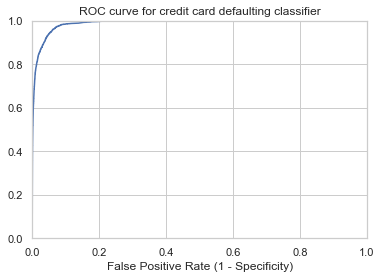

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [31]:
uc_roc_1 = str(roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

NameError: name 'auc_roc_1' is not defined

In [32]:
print(confusion_matrix(y_test, y_pred))

[[149888    305]
 [   953   1033]]


In [33]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))

=== f1 score on test===
0.6215403128760529


In [ ]:
print('Start training...')
# 创建模型，训练模型
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=20)
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=5)

print('Start predicting...')
# 测试机预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 模型评估
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))

# 网格搜索，参数优化
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)
